In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import  RocCurveDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.isotonic import IsotonicRegression  
import xgboost as xgb
import joblib
import pickle
import seaborn as sns

In [4]:
care_link_path = "/content/drive/MyDrive/classwork/ML_project/data/care_link.csv"

Read and clean DataFrames

In [5]:
carelink_df = pd.read_csv(care_link_path)

In [6]:
# undestanding the data scale 
carelink_df.shape

(31287, 48)

In [7]:
# Removing Duplicates
carelink_df.drop_duplicates(inplace= True)

In [8]:
carelink_df.shape

(31270, 48)

In [9]:
# Checking for null values 

carelink_df.isna().sum()[carelink_df.isna().sum() > 0]

inside_sale_owner_name                       2
consultation_fee                          3459
payment_done_at                          24842
crm_lead_status                             16
zoho_status_reason                       28298
first_bill_sent                          20817
enrolled_on_to_bill_sent                 20817
bill_sent_to_payment_done                24843
enrolled_on_to_payment_done              24842
enrolled_on_to_bill_sent_hours           20817
bill_sent_to_payment_done_hours          24843
enrolled_on_to_payment_done_hours        24842
first_inbound_message                     6822
last_inbound_message                      6822
duration_in_seconds                          2
last_attempted_call_time                  5324
days_since_last_call_attempt              5324
first_message_to_first_call_time_mins     6822
careplan_prescription_awareness          27622
careplan_pricing_awareness               28293
age                                      28096
height_cm    

In [10]:
# understanding the data set - each customer has multiple engagements with sales team 
carelink_df.patient_id.value_counts()[carelink_df.patient_id.value_counts() > 1].head()

d6e07ccc-377e-49dd-bc98-2a2326f584c6    5
54145ebe-21bf-4b8d-b791-b746354de961    5
9cdc4f2a-19b1-4132-9a1c-cddbb5894df5    4
1004f63d-557a-49f1-a589-1fe74c84dd26    4
2d88fdc0-7db9-468e-a056-b892d89f147f    4
Name: patient_id, dtype: int64

In [11]:
# All the programs sold -> looks like target customers are pregnant women 


print(carelink_df.program_type.value_counts())




pregnancy      21056
pcos            6449
weight_loss     2003
postpartum      1762
Name: program_type, dtype: int64


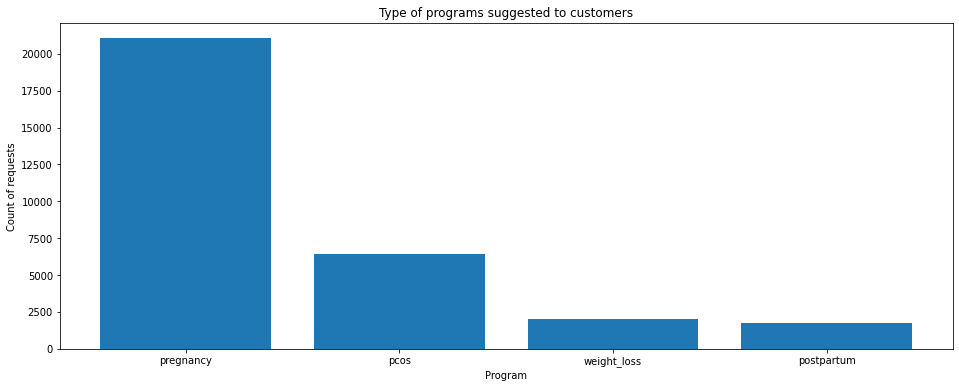

In [12]:
plt.subplots(figsize = (16,6))
plt.bar(x = list(carelink_df.program_type.value_counts().index), 
        height =list(carelink_df.program_type.value_counts()))
plt.title("Type of programs suggested to customers")
plt.xlabel("Program")
plt.ylabel("Count of requests");

In [13]:
# Checking for Class impalance - not bad
round(carelink_df.payment_done_at.isna().mean() * 100, 2)

79.44

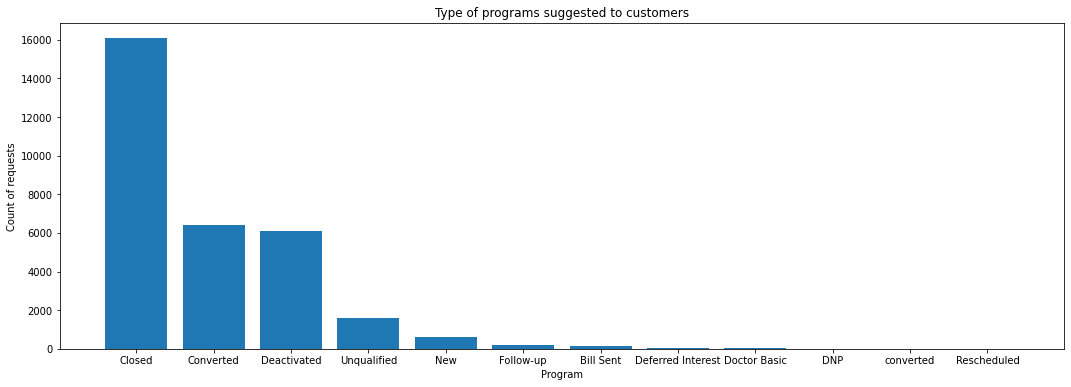

In [14]:
# Understanding the status of sale leads - doesn't make sense 

plt.subplots(figsize = (18,6))
plt.bar(x = list(carelink_df.crm_lead_status.value_counts().index), 
        height =list(carelink_df.crm_lead_status.value_counts()))
plt.title("Type of programs suggested to customers")
plt.xlabel("Program")
plt.ylabel("Count of requests");


In [15]:
# Creating the response variable -> reponse only if there is a payment date

carelink_df['response'] = np.where(carelink_df.payment_done_at.isna(), 0,1)

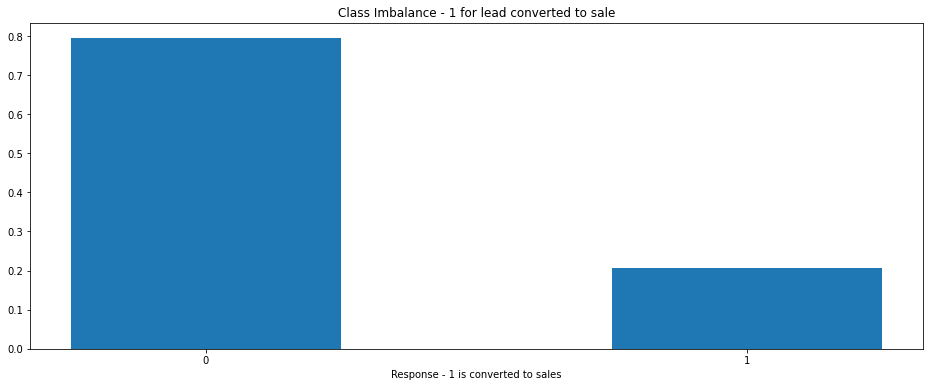

In [19]:
# 20% conversion rate is Not bad -:)

fig,ax = plt.subplots(figsize = (16,6))
plt.bar( ["0","1"], carelink_df['response'].value_counts(normalize=True), width= .5)
plt.title("Class Imbalance - 1 for lead converted to sale")
plt.xlabel("Response - 1 is converted to sales");

In [ ]:
# understanding the data -> interactions with patients and sales reps

carelink_df[carelink_df.patient_id == "d6e07ccc-377e-49dd-bc98-2a2326f584c6"]

,careplan_prescribed_on,patient_id,slug,inside_sale_owner_name,cl_bd_area,doctor_category,program_type,consultation_fee,careplan_price,payment_done_at,onboarding_type,language,crm_lead_status,zoho_status_reason,first_bill_sent,enrolled_on_to_bill_sent,bill_sent_to_payment_done,enrolled_on_to_payment_done,enrolled_on_to_bill_sent_hours,bill_sent_to_payment_done_hours,enrolled_on_to_payment_done_hours,message_count_7,message_count_3,message_count_1,message_count_before_first_call,first_inbound_message,last_inbound_message,successful_calls,unsuccessful_calls,duration_in_seconds,total_attempted_calls,last_attempted_call_time,days_since_last_call_attempt,first_message_to_first_call_time_mins,prescription_to_first_call_time_mins,careplan_prescribed_on_week,careplan_prescribed_on_month,careplan_prescription_awareness,careplan_pricing_awareness,age,height_cm,weight_kg,profession,delivery_date,pregnancy_count,phone_number_belongs_to,symptoms,goals,response
6343,2023-01-19,d6e07ccc-377e-49dd-bc98-2a2326f584c6,priyanka-gup,Humaira,Kanpur,B,pregnancy,400.0,0,NaN,invite,en-us,Deactivated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,2022-10-06 08:50:47,2023-01-21 12:45:15,3,12,1179.0,15,2023-01-19 05:45:09,42.0,246.0,-150991,3,1,NaN,NaN,NaN,162.56,NaN,housewife,NaN,NaN,NaN,NaN,NaN,0
7315,2023-01-14,d6e07ccc-377e-49dd-bc98-2a2326f584c6,priyanka-gup,Gurjant Singh,Kanpur,B,pregnancy,400.0,0,NaN,invite,en-us,Deactivated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,2022-10-06 08:50:47,2023-01-21 12:45:15,3,12,1179.0,15,2023-01-19 05:45:09,42.0,246.0,-143817,2,1,Doctor just informed about prescription,NaN,NaN,162.56,80.0,housewife,NaN,NaN,NaN,Backache,[],0
14763,2022-11-24,d6e07ccc-377e-49dd-bc98-2a2326f584c6,priyanka-gup,Kanchana Mishra,Kanpur,B,weight_loss,400.0,0,NaN,invite,hn,Deactivated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,2022-10-06 08:50:47,2023-01-21 12:45:15,3,12,1179.0,15,2023-01-19 05:45:09,42.0,246.0,-70395,47,11,NaN,NaN,NaN,162.56,NaN,housewife,NaN,NaN,NaN,NaN,NaN,0
20251,2022-10-06,d6e07ccc-377e-49dd-bc98-2a2326f584c6,priyanka-gup,Kanchana Mishra,Kanpur,B,postpartum,400.0,0,NaN,invite,en-us,Deactivated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,2022-10-06 08:50:47,2023-01-21 12:45:15,3,12,1179.0,15,2023-01-19 05:45:09,42.0,246.0,249,40,10,NaN,NaN,NaN,162.56,NaN,housewife,NaN,NaN,NaN,NaN,NaN,0
20253,2022-10-06,d6e07ccc-377e-49dd-bc98-2a2326f584c6,priyanka-gup,Kanchana Mishra,Kanpur,B,pcos,400.0,0,NaN,invite,hn,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,2022-10-06 08:50:47,2023-01-21 12:45:15,3,12,1179.0,15,2023-01-19 05:45:09,42.0,246.0,70,40,10,NaN,NaN,NaN,162.56,NaN,housewife,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# for all the people who converted, they were not contacted more than twice -> looks like perseverance doesn't help

carelink_df[carelink_df['response'] ==1].patient_id.value_counts().reset_index(drop = True).value_counts()


1    6380
2      24
Name: patient_id, dtype: int64

In [ ]:
# Number of times non converted patients were contacted 

carelink_df[carelink_df['response'] ==0].patient_id.value_counts().reset_index(drop = True).value_counts() 

1    22847
2      896
3       51
4       10
5        2
Name: patient_id, dtype: int64

In [ ]:
# Conversion rate per proffession -> working proffessionals seem to have higher conversion rate -> interesting :)

carelink_df.groupby("profession")['response'].value_counts(dropna= False, normalize = True ) *100

profession  response
housewife   0           77.719962
            1           22.280038
student     0           72.924188
            1           27.075812
working     0           63.089802
            1           36.910198
Name: response, dtype: float64

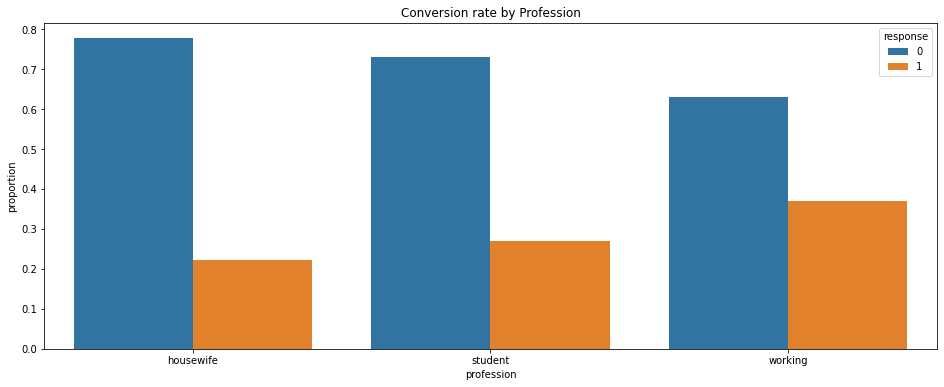

In [ ]:
fig,ax = plt.subplots(figsize = (16,6))

temp_plot = carelink_df.groupby("profession", as_index = False)['response'].value_counts(dropna= False, normalize = True )

sns.barplot(y = temp_plot['proportion'], hue = temp_plot['response'],x = temp_plot['profession'])
plt.title("Conversion rate by Profession");


In [ ]:
# Okay -- this is fun :) So if husbands pick up the call, the conversion rate is super low - convertion is high if patient picks up the call

carelink_df.groupby("phone_number_belongs_to")['response'].value_counts(dropna= False , normalize = True) *100


phone_number_belongs_to  response
family_member            0           84.210526
                         1           15.789474
husband                  0           95.911950
                         1            4.088050
patient                  0           68.709517
                         1           31.290483
Name: response, dtype: float64

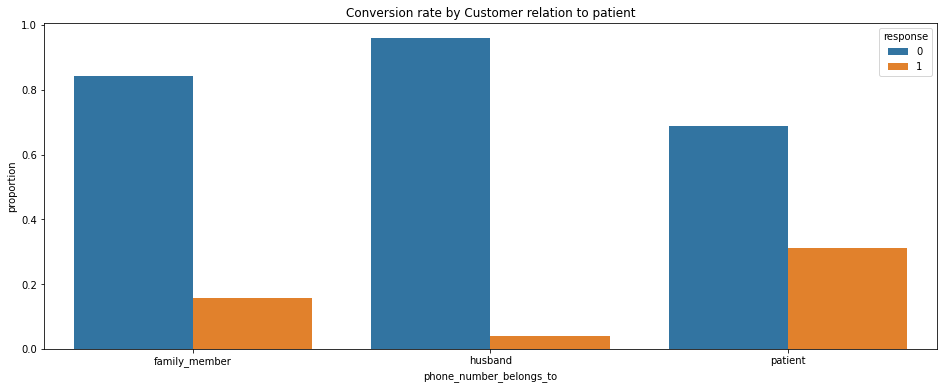

In [ ]:
fig,ax = plt.subplots(figsize = (16,6))

temp_plot = carelink_df.groupby("phone_number_belongs_to", as_index = False)['response'].value_counts(dropna= False , normalize = True) 

sns.barplot(y = temp_plot['proportion'], hue = temp_plot['response'],x = temp_plot['phone_number_belongs_to'])
plt.title("Conversion rate by Customer relation to patient");


#### Feature Eng

In [ ]:
# Create a set of features to aggregate all data 

temp = carelink_df[['careplan_prescribed_on','patient_id','slug',
                    'inside_sale_owner_name','cl_bd_area',
                   'doctor_category','program_type','onboarding_type','crm_lead_status',
                   'careplan_prescription_awareness','careplan_pricing_awareness']].drop_duplicates()\
.reset_index(drop = True)

In [ ]:
# each patient is promoted by same doctor 

temp.groupby(["patient_id"])['slug'].value_counts()[temp.groupby(["patient_id"])['slug'].value_counts() > 1].sort_values(ascending = False)

patient_id                            slug            
d6e07ccc-377e-49dd-bc98-2a2326f584c6  priyanka-gup        5
54145ebe-21bf-4b8d-b791-b746354de961  monika-chauhan      5
1004f63d-557a-49f1-a589-1fe74c84dd26  arti-pandey         4
aaf10b71-cc21-4f92-8612-913351890682  namita-agrawal      4
2d11d422-fa99-4d11-b466-c68181809f8a  anu-sindhu          4
                                                         ..
57a1a727-c132-4ea3-9341-eb8043a4dfd0  sonal-shroff        2
576d2006-9716-410f-8bab-02dcce544590  suneeta-singh       2
573ffbd7-8060-40d7-9166-608415535073  hemangi-negi        2
57262582-3197-49bf-a2c9-54e45509627c  monika-chauhan      2
ffe12e1b-f2fc-4170-9d8e-4af5a4a97dcb  purnima-tripathi    2
Name: slug, Length: 1227, dtype: int64

In [ ]:
# Each patient is contacted by different sales persons 

temp.groupby(["patient_id"])['inside_sale_owner_name'].value_counts()[temp.groupby(["patient_id"])['inside_sale_owner_name'].value_counts() > 1].sort_values(ascending = False)

patient_id                            inside_sale_owner_name
2d11d422-fa99-4d11-b466-c68181809f8a  Kanchana Mishra           4
61ce6a5d-9a25-4937-a77b-fae3e726a17d  Priyanka Bhatnagar        3
565892f1-035a-468f-98fd-8057821a5388  Mehak Thareja             3
ec1d0463-c04d-46c0-99bf-6e5f9c8211eb  Riya Chuttani             3
61e1922e-60a4-4584-ae14-9a5058ad1061  Priyanka Bhatnagar        3
                                                               ..
4f1733e8-a808-4b46-9a87-d4f4285eb206  Priyanka Bhatnagar        2
4fb54ed2-b4cb-4cd8-9ce6-3952afcc6793  Kanchana Mishra           2
4ff66a4d-a285-470e-b238-20a9f69afd3b  Anish Lohiya              2
50c6e363-4b10-4ca7-a28d-9170e212588a  Ruqaya                    2
fd1bb779-b419-4bcf-98cb-f89c26ac1cf6  Vishal Kumar              2
Name: inside_sale_owner_name, Length: 683, dtype: int64

In [ ]:


unique_temp = temp.groupby(['patient_id'], as_index= False)[['slug','inside_sale_owner_name',
                                                             'doctor_category','program_type',
                                                             'onboarding_type','crm_lead_status',
                                                            'careplan_prescription_awareness',
                                                             'careplan_pricing_awareness']].nunique()

unique_temp.columns = ['patient_id', 'nunique_slug', 'nunique_ison', 'nunique_doctor_category',
                       'nunique_program_type','nunique_onboarding_type',
                       'nunique_crm_lead_status','nunique_careplan_prescription_awareness','nunique_careplan_pricing_awareness']


In [ ]:
agg_df = carelink_df.groupby(['patient_id'], as_index = False).agg({'careplan_prescribed_on' :max,
                                                                    'response':max,
                                                                    'consultation_fee':np.mean,
                                                                    "message_count_7":max,
                                                                    "message_count_3":max,
                                                                    "message_count_1":max,
                                                                   "message_count_before_first_call":max})

In [ ]:
(unique_temp.iloc[:,1:] > 1).sum()

nunique_slug                                 2
nunique_ison                               587
nunique_doctor_category                      2
nunique_program_type                       872
nunique_onboarding_type                    181
nunique_crm_lead_status                    854
nunique_careplan_prescription_awareness      3
nunique_careplan_pricing_awareness           1
dtype: int64

In [ ]:
knowledge_df = carelink_df[['patient_id','careplan_prescription_awareness','careplan_pricing_awareness']].dropna().drop_duplicates()

In [ ]:
knowledge_df = knowledge_df.groupby(["patient_id"], as_index=False).min(numeric_only=False)

# [knowledge_df.patient_id == "06152cbb-aca9-4f3a-b37c-b143840c9fd4"]

In [ ]:
min(knowledge_df.careplan_prescription_awareness.unique())

'Co-ordinator/staff informed about prescription'

In [ ]:
carelink_df.careplan_prescription_awareness.unique()

array([nan, 'Not aware at all', 'Doctor just informed about prescription',
       'Co-ordinator/staff informed about prescription',
       'Doctor properly explained the care plan'], dtype=object)

In [ ]:
temp_remove = pd.merge(left = agg_df[['patient_id','careplan_prescribed_on']], right = temp, on = ['patient_id','careplan_prescribed_on'], 
         how = "left")

In [ ]:
temp_remove = temp_remove.groupby(by=['patient_id'], as_index = False).max(numeric_only=False)

<ipython-input-32-485695f25b15>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  temp_remove = temp_remove.groupby(by=['patient_id'], as_index = False).max(numeric_only=False)


In [ ]:
features_df  = pd.merge(left = 
                        pd.merge(left =pd.merge(left = temp_remove, right = unique_temp, on = ['patient_id'], how = "left"),
                        right = agg_df, on = ['patient_id','careplan_prescribed_on'], how = 'left'),
                        right = knowledge_df, on = ['patient_id'], how = 'left')

In [ ]:
features_df.consultation_fee= features_df.consultation_fee.fillna(0)

In [ ]:
features_df.fillna("Unknown", inplace= True)

In [ ]:
features_df.head()

,patient_id,careplan_prescribed_on,slug,inside_sale_owner_name,cl_bd_area,doctor_category,program_type,onboarding_type,nunique_slug,nunique_ison,nunique_doctor_category,nunique_program_type,nunique_onboarding_type,nunique_crm_lead_status,nunique_careplan_prescription_awareness,nunique_careplan_pricing_awareness,response,consultation_fee,message_count_7,message_count_3,message_count_1,message_count_before_first_call,careplan_prescription_awareness,careplan_pricing_awareness
0,00017701-a269-462e-96ec-a98d155c2591,2022-07-12,poonam-raikwar,Riya Chuttani,Indore,C,pcos,invite,1,1,1,1,1,1,0,0,0,350.0,0,0,0,0,Unknown,Unknown
1,0004bef9-f22b-45df-bfca-2a1f7f747afc,2022-09-12,anu-sindhu,Kanchana Mishra,Gurugram,C,pcos,invite,1,1,1,1,1,1,0,0,0,600.0,0,0,0,0,Unknown,Unknown
2,00068136-fb4e-4d4e-9c9c-4f48b6b60c57,2022-06-20,anupma-gupta,Anjana Rahi,Delhi,Premium,pcos,invite,1,1,1,1,1,1,0,0,1,1000.0,5,1,1,18,Unknown,Unknown
3,0006f095-5ada-4a6e-b207-ff6054f65d61,2023-01-06,rohini-kumari,Health Coach,Gurugram,B,pregnancy,invite,1,1,1,1,1,1,0,0,0,400.0,0,0,0,0,Unknown,Unknown
4,000e2f09-e6e4-4c92-aadf-a94d674982ee,2022-10-08,purnima-jain,Neha Dixit,Delhi,B,postpartum,invite,1,1,1,1,1,1,0,0,0,1000.0,2,2,0,0,Unknown,Unknown


In [ ]:
features_process_df = features_df.copy()
time_features_df = pd.DataFrame(features_process_df.careplan_prescribed_on.apply(lambda x : x.split("-")).tolist(), 
                                index= features_process_df.index, columns= [0, "month", "day"]).drop(columns= [0]).astype(int)



features_process_df[['month', 'day']] = time_features_df
features_process_df = features_df.drop(columns=['patient_id', 'careplan_prescribed_on'])

In [ ]:
features_process_df.head()

,slug,inside_sale_owner_name,cl_bd_area,doctor_category,program_type,onboarding_type,nunique_slug,nunique_ison,nunique_doctor_category,nunique_program_type,nunique_onboarding_type,nunique_crm_lead_status,nunique_careplan_prescription_awareness,nunique_careplan_pricing_awareness,response,consultation_fee,message_count_7,message_count_3,message_count_1,message_count_before_first_call,careplan_prescription_awareness,careplan_pricing_awareness
0,poonam-raikwar,Riya Chuttani,Indore,C,pcos,invite,1,1,1,1,1,1,0,0,0,350.0,0,0,0,0,Unknown,Unknown
1,anu-sindhu,Kanchana Mishra,Gurugram,C,pcos,invite,1,1,1,1,1,1,0,0,0,600.0,0,0,0,0,Unknown,Unknown
2,anupma-gupta,Anjana Rahi,Delhi,Premium,pcos,invite,1,1,1,1,1,1,0,0,1,1000.0,5,1,1,18,Unknown,Unknown
3,rohini-kumari,Health Coach,Gurugram,B,pregnancy,invite,1,1,1,1,1,1,0,0,0,400.0,0,0,0,0,Unknown,Unknown
4,purnima-jain,Neha Dixit,Delhi,B,postpartum,invite,1,1,1,1,1,1,0,0,0,1000.0,2,2,0,0,Unknown,Unknown


In [ ]:
features_process_df.careplan_prescription_awareness.value_counts()

Unknown                                           26984
Doctor just informed about prescription            1918
Not aware at all                                    843
Doctor properly explained the care plan             115
Co-ordinator/staff informed about prescription       78
Name: careplan_prescription_awareness, dtype: int64

In [ ]:

logit_features = pd.get_dummies(features_process_df, 
                                columns= ['slug','inside_sale_owner_name','cl_bd_area','doctor_category',
                                          'program_type','onboarding_type','careplan_prescription_awareness',
                                          'careplan_pricing_awareness'],
                               drop_first=True)

In [ ]:
features_y = logit_features.loc[:,['response']]
features_x = logit_features.drop(columns=['response'])


In [ ]:
# train test split 
train_x, test_x, train_y, test_y = train_test_split(features_x, features_y,test_size = .2,random_state = 254, stratify=features_y)

In [ ]:
# logistic regression model 
lr_model = LogisticRegression(random_state=25, max_iter= 10000).fit(train_x, train_y.response)

In [ ]:
val_lr = lr_model.predict(test_x)

In [ ]:
print(classification_report(test_y.response,val_lr))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4707
           1       0.81      0.59      0.68      1281

    accuracy                           0.88      5988
   macro avg       0.85      0.78      0.81      5988
weighted avg       0.88      0.88      0.88      5988



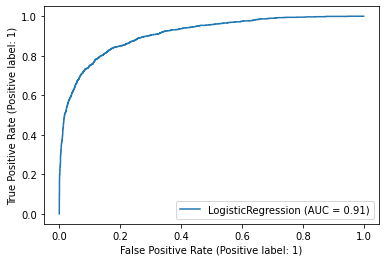

In [ ]:
RocCurveDisplay.from_estimator(lr_model, test_x,test_y);

In [ ]:
# lasso logistic regression CV with k = 6 

lr_cv_model = LogisticRegressionCV(cv = 6, random_state=25,class_weight= "balanced", 
                                   penalty= 'l1', solver= 'saga').fit(train_x, train_y.response)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

In [ ]:
val_lr_cv = lr_cv_model.predict(test_x)

In [ ]:
print(classification_report(test_y.response,val_lr_cv))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      4707
           1       0.59      0.75      0.66      1281

    accuracy                           0.84      5988
   macro avg       0.76      0.80      0.78      5988
weighted avg       0.85      0.84      0.84      5988



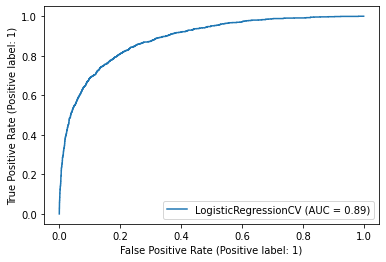

In [ ]:
RocCurveDisplay.from_estimator(lr_cv_model, test_x,test_y);

In [ ]:
# Save the model 

In [ ]:
lr_cv_path = "/content/drive/MyDrive/classwork/ML_project/models/lr_cv_model.pkl"

In [ ]:
pickle.dump(lr_cv_model, open(lr_cv_path, 'wb'))

#### Random Forest Classifier

In [ ]:
rfc_model = RandomForestClassifier(n_estimators = 500, max_depth=30, random_state=25)

rfc_model.fit(train_x, train_y.response)

val_rfc = rfc_model.predict(test_x)

print(classification_report(test_y.response,val_rfc))




              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4707
           1       0.86      0.54      0.67      1281

    accuracy                           0.88      5988
   macro avg       0.87      0.76      0.80      5988
weighted avg       0.88      0.88      0.87      5988



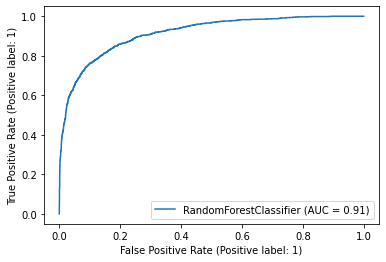

In [ ]:
RocCurveDisplay.from_estimator(rfc_model, test_x,test_y);

In [ ]:
rfc_path = "/content/drive/MyDrive/classwork/ML_project/models/rfc_model.pkl"


In [ ]:
pickle.dump(rfc_model, open(rfc_path, 'wb'))

### XGBOOST

In [ ]:
from pandas.core.common import random_state
xgbc_model = xgb.XGBClassifier(random_state = 25)

xgbc_model.fit(train_x, train_y.response)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=25, ...)

In [ ]:
val_xgbc = xgbc_model.predict(test_x)

print(classification_report(test_y.response,val_xgbc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4707
           1       0.81      0.67      0.74      1281

    accuracy                           0.90      5988
   macro avg       0.86      0.81      0.84      5988
weighted avg       0.89      0.90      0.89      5988



In [ ]:
xgbc_path = "/content/drive/MyDrive/classwork/ML_project/models/xgbc_model.pkl"

pickle.dump(xgbc_model, open(xgbc_path, 'wb'))

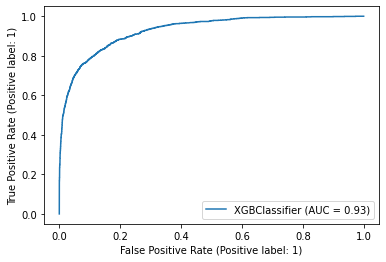

In [ ]:
RocCurveDisplay.from_estimator(xgbc_model, test_x,test_y);

#### Parameter tuning using Gridsearch CV  - USE GPU -> will take a lot of time

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

xgbc_tune_model = xgb.XGBClassifier(objective="binary:logistic",tree_method='gpu_hist', gpu_id=0,random_state = 25, max_delta_step=1)

In [ ]:
grid_cv = GridSearchCV(xgbc_tune_model, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

In [ ]:
grid_cv.fit(train_x, train_y.response)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=25, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
grid_cv

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None, gpu_id=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=25, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:

xgbgs_path = "/content/drive/MyDrive/classwork/ML_project/models/grid_cv_xgbc_model.pkl"

joblib.dump(grid_cv, xgbgs_path)

['/content/drive/MyDrive/classwork/ML_project/models/grid_cv_xgbc_model.pkl']

In [ ]:
xgbc_be_model = grid_cv.best_estimator_

In [ ]:
val_xgbc_be = xgbc_be_model.predict(test_x)

print(classification_report(test_y.response,val_xgbc_be))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4707
           1       0.81      0.66      0.73      1281

    accuracy                           0.90      5988
   macro avg       0.86      0.81      0.83      5988
weighted avg       0.89      0.90      0.89      5988



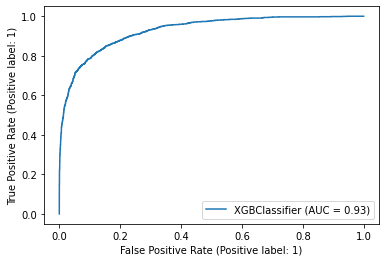

In [ ]:
RocCurveDisplay.from_estimator(xgbc_be_model, test_x,test_y);

In [ ]:


xgbc_be_model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'eval_metric': None,
 'gamma': 1,
 'gpu_id': 0,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 25,
 'reg_alpha': None,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': None}

#### Tuning two -> get best params 

In [ ]:
param_grid_2 = {'max_depth': [ 7, 9,10, 12, 13],
 'learning_rate': [0.1,0.2,0.3,0.4],
 'gamma': [1, 1.5,2,2.5,3.5,4],
 'reg_lambda': [1],
 'scale_pos_weight': [1],
 'subsample': [0.8],
 'colsample_bytree': [0.5]}

In [ ]:
from sklearn.model_selection import GridSearchCV

xgbc_tune_model_2 = xgb.XGBClassifier(objective="binary:logistic",tree_method='gpu_hist', gpu_id=0,random_state = 25, max_delta_step=1)

grid_cv_2 = GridSearchCV(xgbc_tune_model_2, param_grid_2, n_jobs=-1, cv=3, scoring="roc_auc")

grid_cv_2.fit(train_x, train_y.response)

xgbgs_path_2 = "/content/drive/MyDrive/classwork/ML_project/models/grid_cv_xgbc_model_2.pkl"

joblib.dump(grid_cv, xgbgs_path_2)

['/content/drive/MyDrive/classwork/ML_project/models/grid_cv_xgbc_model_2.pkl']

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4707
           1       0.82      0.68      0.74      1281

    accuracy                           0.90      5988
   macro avg       0.87      0.82      0.84      5988
weighted avg       0.90      0.90      0.90      5988



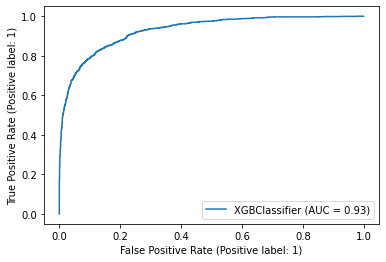

In [ ]:
xgbc_be_model_2 = grid_cv_2.best_estimator_

val_xgbc_be_2 = xgbc_be_model_2.predict(test_x)

print(classification_report(test_y.response,val_xgbc_be_2))


RocCurveDisplay.from_estimator(xgbc_be_model_2, test_x,test_y);

#### Small perfomance boost after a lot of computation

In [ ]:
xgbc_be_model_2.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'eval_metric': None,
 'gamma': 2,
 'gpu_id': 0,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 1,
 'max_depth': 12,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 25,
 'reg_alpha': None,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
final_xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', colsample_bytree= 0.5,
                                     gamma= 2, gpu_id= 0,learning_rate= 0.1, max_delta_step= 1,
                                    max_depth= 12, random_state= 25, reg_lambda= 1, scale_pos_weight= 1,
                                    subsample= 0.8, tree_method ='gpu_hist').fit(train_x, train_y.response)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4707
           1       0.82      0.68      0.74      1281

    accuracy                           0.90      5988
   macro avg       0.87      0.82      0.84      5988
weighted avg       0.90      0.90      0.90      5988



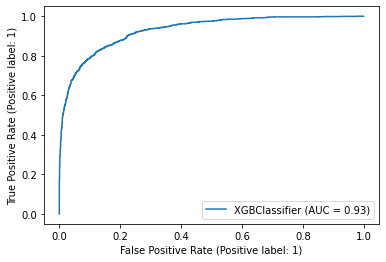

In [ ]:
val_xgbc_be_2 = final_xgb_model.predict(test_x)

print(classification_report(test_y.response,val_xgbc_be_2))


RocCurveDisplay.from_estimator(final_xgb_model, test_x,test_y);

In [ ]:
xgbgs_path_2 = "/content/drive/MyDrive/classwork/ML_project/models/xgbc_model_final.pkl"

joblib.dump(final_xgb_model,xgbgs_path_2)

['/content/drive/MyDrive/classwork/ML_project/models/xgbc_model_final.pkl']

Using Nural Networks as a binary classifier

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_base_nn = tf.keras.Sequential([ tf.keras.layers.Dense(1),

                               tf.keras.layers.Dense(1)

])

In [ ]:
model_base_nn.compile(loss = tf.keras.losses.BinaryCrossentropy(),

                optimizer = tf.keras.optimizers.SGD(),

                metrics = ['accuracy'])

In [ ]:
model_base_nn.fit(train_x, train_y.response, epochs = 100, verbose = 0)

In [ ]:
model_base_nn.evaluate(train_x, train_y.response)

749/749 [==============================] - 2s 2ms/step - loss: 11.9874 - accuracy: 0.2139


[11.987387657165527, 0.21390396356582642]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(20, input_dim= 916,activation = 'relu'),
                               
                               tf.keras.layers.Dense(10, activation = 'relu'), 

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'softmax')

])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),

                optimizer = tf.keras.optimizers.SGD(),

                metrics = [tf.keras.metrics.Precision(thresholds=0)])


model_2.fit(train_x, train_y.response, epochs = 100, verbose = 0)



In [ ]:
val_model_2 = model_2.predict(train_x)

print(classification_report(train_y.response,val_model_2))


# RocCurveDisplay.from_estimator(model_2, test_x,test_y);



749/749 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18827
           1       0.21      1.00      0.35      5123

    accuracy                           0.21     23950
   macro avg       0.11      0.50      0.18     23950
weighted avg       0.05      0.21      0.08     23950



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sum(val_model_2)

array([23950.], dtype=float32)

In [ ]:
model_2.evaluate(test_x, test_y.response)

188/188 [==============================] - 1s 4ms/step - loss: 0.4940 - precision_2: 0.2139


[0.4939676821231842, 0.21392785012722015]

In [ ]:
model_2.evaluate(test_x, test_y.response) 

188/188 [==============================] - 1s 3ms/step - loss: 0.4940 - precision_2: 0.2139


[0.4939676821231842, 0.21392785012722015]

The Neural networks models do not seem to perform well - the outcome is always 1 which is not desirable. 

##### Lets get back to XG boost and get probabilities for each patient 

In [ ]:
xgbgs_path_2 = "/content/drive/MyDrive/classwork/ML_project/models/xgbc_model_final.pkl"

xgbgs_model = joblib.load(xgbgs_path_2)

rfc_path = "/content/drive/MyDrive/classwork/ML_project/models/rfc_model.pkl"

rfc_model = pickle.load(open(rfc_path, 'rb'))


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
prob_val_xgb = xgbgs_model.predict_proba(train_x)[:, 1]

iso_reg_xgb = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds = 'clip').fit(prob_val_xgb,train_y.response)
proba_adjusted_xgb = iso_reg_xgb.predict(xgbgs_model.predict_proba(test_x)[:, 1])


prob_val_rfc = rfc_model.predict_proba(train_x)[:, 1]

iso_reg_rfc = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds = 'clip').fit(prob_val_rfc,train_y.response)
proba_adjusted_rfc = iso_reg_rfc.predict(rfc_model.predict_proba(test_x)[:, 1])


In [ ]:
proba_adjusted_rfc

array([0.03589744, 0.        , 1.        , ..., 0.0033557 , 0.00661157,
       0.99330357])

In [ ]:
proba_adjusted_xgb

array([0.06273063, 0.0025    , 0.7548387 , ..., 0.02193548, 0.06499261,
       0.97643095], dtype=float32)

In [ ]:
patients = features_df.iloc[test_y.index,].patient_id

In [ ]:
suggestion_df = pd.DataFrame({"patient_id":patients,"probability_rfc":proba_adjusted_rfc,
                              "raw_rfc_score":rfc_model.predict_proba(test_x)[:, 1],
                              
                              "probability_xgb":proba_adjusted_xgb, 
                              "raw_xgb_score":xgbgs_model.predict_proba(test_x)[:, 1],
                              "True_conversion":test_y.response})

In [ ]:
suggestion_df.loc[(suggestion_df.True_conversion>0) & (suggestion_df.probability_xgb<0.5) ,:]

,patient_id,probability_rfc,raw_rfc_score,probability_xgb,raw_xgb_score,True_conversion
5754,32215f0a-1dd8-460e-bae4-bf496cb2a862,0.045045,0.168173,0.113287,0.125608,1
9976,55a9d462-d77c-4307-bf23-29b0672fd46b,0.006684,0.124439,0.062731,0.093195,1
2799,183cf278-6559-4e65-bc3c-ea9432c05486,0.001852,0.077396,0.040870,0.065442,1
27290,e901c45c-de46-40cf-b3c5-5e0e78177ad3,0.143902,0.241361,0.230453,0.206879,1
29162,f955e542-3ce0-473f-93b2-c890ad6cdd28,0.143902,0.227487,0.113287,0.127372,1
...,...,...,...,...,...,...
20735,b1481582-77d1-4e7e-9741-caaabdf22ccd,0.192105,0.256061,0.444444,0.405024,1
6926,3c28dc59-65b6-4e31-9144-d12bd16839f2,0.684211,0.418801,0.475771,0.446317,1
27873,ee4f43e4-838b-4e43-8972-6b65bcebd10a,0.192105,0.263676,0.444444,0.397833,1
6682,3a08610e-cfcf-420c-b55c-1fc0abf68faa,0.133929,0.222619,0.113287,0.136490,1


In [ ]:
out_path = "/content/drive/MyDrive/classwork/ML_project/data/result_ml.csv"

suggestion_df.to_csv(out_path,index=False)